<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/Bank_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load, prepare and inspect the datasets

In [214]:
import pandas as pd

df3=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/bank--full.txt')

df3.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [215]:
# columwise sum of all na values
import numpy as np

df3.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [216]:
# columnwise sum of all nul values
import numpy as np

df3.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
#Replacing y in 1 in plcae of yes and 0 in place of 0
df3["y"].replace({"yes": 1, "no": 0}, inplace=True)


In [218]:
df3['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [0]:

#Deleting recurrence-events(1) class data to make imbalance data of 65%
df3=df3.sort_values(by='y', ascending=True)[30000:-1]

In [220]:
#After deleting data as
df3['y'].value_counts()


0    9922
1    5288
Name: y, dtype: int64

In [221]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df3['y'].mean()
clas_std = df3['y'].std()
df3['z-score'] = (df3['y']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df3[df3['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df3)*100
percent_values_plus_minus_one_z_score

65.23339907955292

In [222]:
#Other way of Checking imbalance of data
target_count=df3.y.value_counts()
print(target_count)

imbalance_target=(target_count[0]/(target_count[1]+target_count[0]))*100
print(imbalance_target)

0    9922
1    5288
Name: y, dtype: int64
65.23339907955292


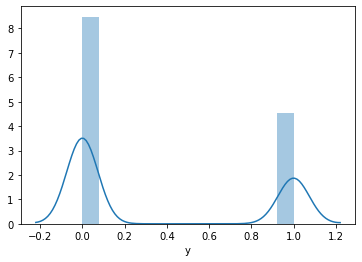

In [223]:
import seaborn as sns

sns.distplot(df3['y'])


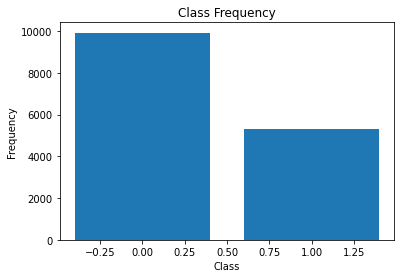

In [224]:
import numpy as np
import matplotlib.pyplot as plt

classes = df3['y'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

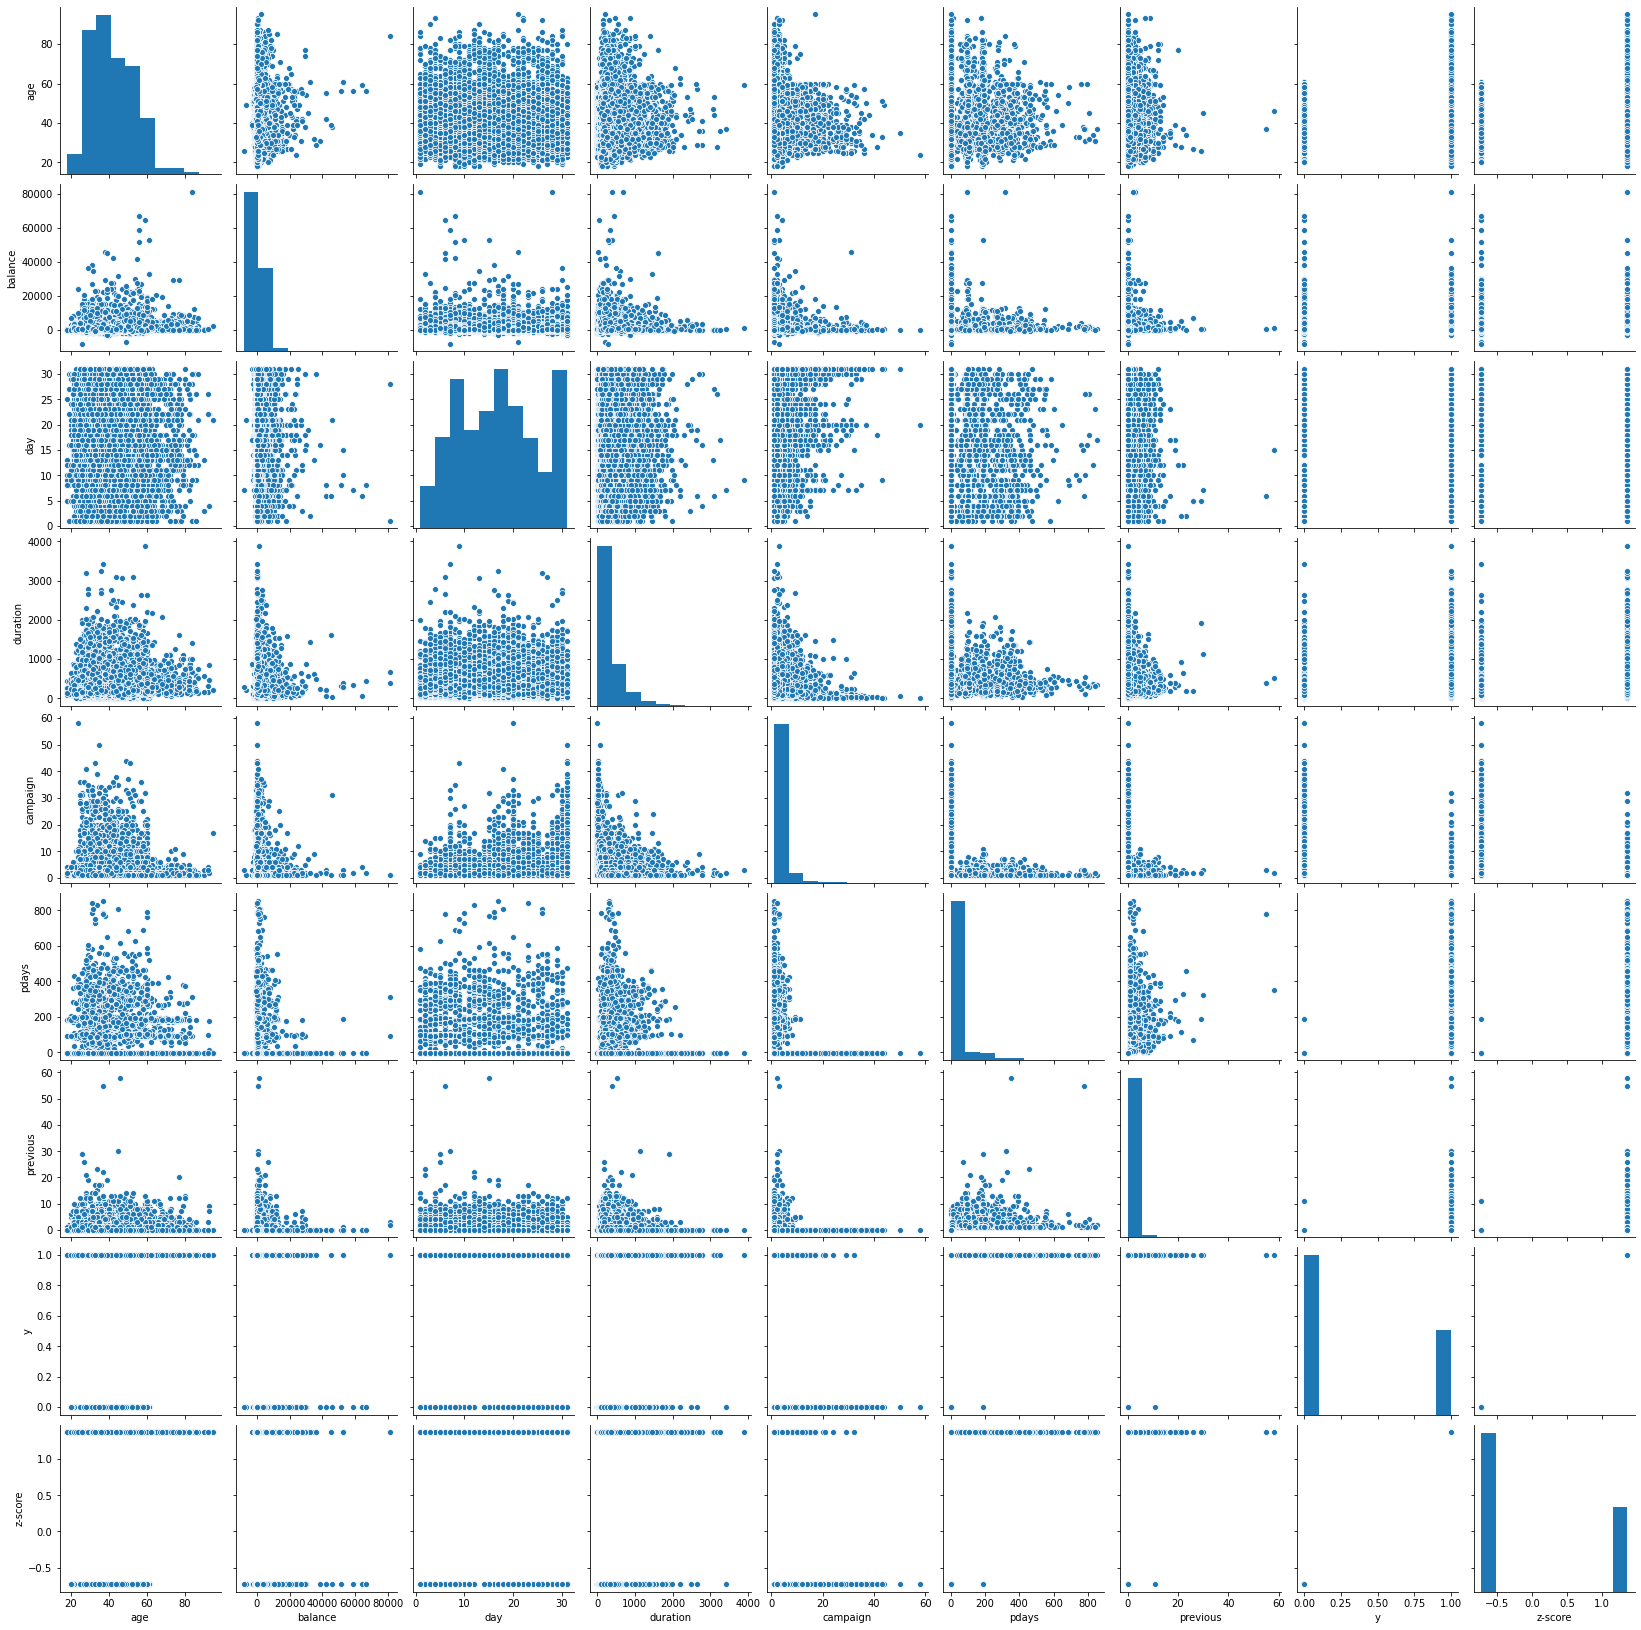

In [225]:
sns.pairplot(df3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef61b7f60>,
      dtype=object)

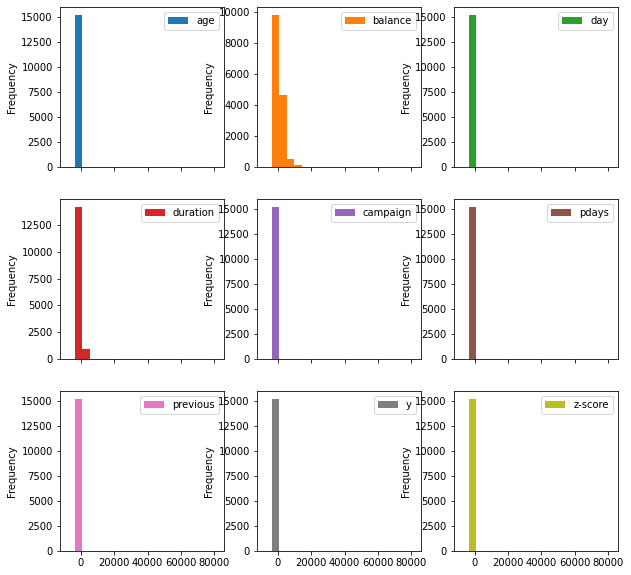

In [226]:
df3.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=20)

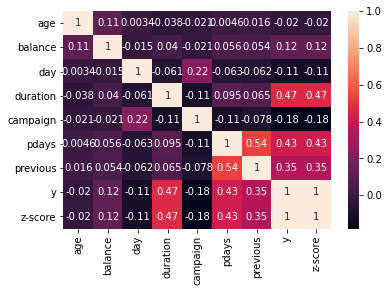

In [227]:
sns.heatmap(df3.corr(), annot=True)

In [228]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'z-score'],
      dtype='object')

In [229]:
#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df3[["job"]] = df3[["job"]].apply(LabelEncoder().fit_transform)
df3[["marital"]] = df3[["marital"]].apply(LabelEncoder().fit_transform)
df3[["education"]] = df3[["education"]].apply(LabelEncoder().fit_transform)
df3[["default"]] = df3[["default"]].apply(LabelEncoder().fit_transform)
df3[["housing"]] = df3[["housing"]].apply(LabelEncoder().fit_transform)
df3[["contact"]] = df3[["contact"]].apply(LabelEncoder().fit_transform)
df3[["month"]] = df3[["month"]].apply(LabelEncoder().fit_transform)
df3[["loan"]] = df3[["loan"]].apply(LabelEncoder().fit_transform)

df3[["poutcome"]] = df3[["poutcome"]].apply(LabelEncoder().fit_transform)



df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z-score
2913,47,1,1,0,0,502,1,0,2,14,8,28,2,-1,0,3,0,-0.730015
2914,41,0,1,1,0,3634,1,0,2,14,8,216,1,-1,0,3,0,-0.730015
2915,45,9,1,1,0,3395,1,0,2,14,8,215,1,-1,0,3,0,-0.730015
2916,33,0,2,1,0,673,1,0,2,14,8,199,2,-1,0,3,0,-0.730015
2909,42,4,2,1,0,2535,1,0,2,14,8,339,1,-1,0,3,0,-0.730015


In [230]:
X=df3.iloc[:,1:16]
y=df3.iloc[:,16:17]
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z-score
2913,47,1,1,0,0,502,1,0,2,14,8,28,2,-1,0,3,0,-0.730015
2914,41,0,1,1,0,3634,1,0,2,14,8,216,1,-1,0,3,0,-0.730015
2915,45,9,1,1,0,3395,1,0,2,14,8,215,1,-1,0,3,0,-0.730015
2916,33,0,2,1,0,673,1,0,2,14,8,199,2,-1,0,3,0,-0.730015
2909,42,4,2,1,0,2535,1,0,2,14,8,339,1,-1,0,3,0,-0.730015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41107,36,7,2,2,0,1189,0,0,0,17,1,220,1,-1,0,3,1,1.369745
18516,44,9,1,0,0,755,0,1,0,31,5,829,4,-1,0,3,1,1.369745
35192,33,0,1,1,0,-370,1,0,0,7,8,261,1,345,1,0,1,1.369745
41104,77,5,1,2,0,0,0,0,0,17,1,286,1,-1,0,3,1,1.369745


# Cross-validation on your dataset using a decision tree 

-- 10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.00415874, 0.00403833, 0.00398755, 0.00400162, 0.0040617 ,
       0.00409889, 0.00422096, 0.00414348, 0.00414395, 0.00418329]), 'score_time': array([0.00086856, 0.0008111 , 0.00082588, 0.00079155, 0.00103664,
       0.00077963, 0.00081587, 0.00088334, 0.00085068, 0.00084352]), 'test_score': array([0.85901639, 0.80983607, 0.84868421, 0.80921053, 0.77960526,
       0.83223684, 0.82565789, 0.81907895, 0.84539474, 0.80592105])}
Accuracy mean is: 0.8234641932700605
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1988
           1       0.78      0.69      0.73      1054

    accuracy                           0.82      3042
   macro avg       0.81      0.79      0.80      3042
weighted avg       0.82      0.82      0.82      3042



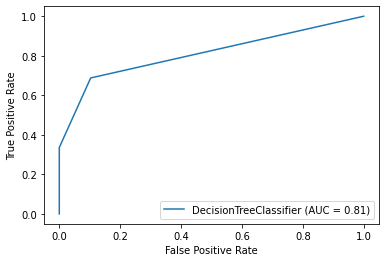

In [231]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

# Cross-validation on your dataset using a random forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


All RF scores: 
{'fit_time': array([0.20912504, 0.20398474, 0.20864701, 0.20649481, 0.20776749,
       0.20944142, 0.20532942, 0.20715475, 0.20794868, 0.20721722]), 'score_time': array([0.00971484, 0.00974846, 0.01039934, 0.00972748, 0.00963783,
       0.00969839, 0.00984716, 0.01041269, 0.00994587, 0.01035261]), 'test_score': array([0.84918033, 0.83278689, 0.82565789, 0.86184211, 0.86184211,
       0.87171053, 0.85855263, 0.8125    , 0.875     , 0.86184211])}
Accuracy mean is: 0.851413543721236
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1988
           1       0.99      0.59      0.74      1054

    accuracy                           0.85      3042
   macro avg       0.90      0.79      0.82      3042
weighted avg       0.88      0.85      0.84      3042



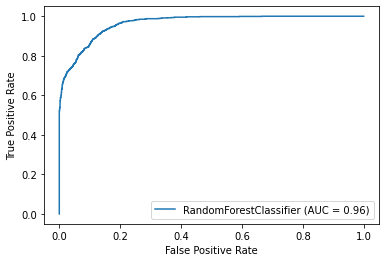

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", scores['test_score'].mean())

print(classification_report(y_test, y_prdct))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


#Partition the datasets into 10 bins keeping the imbalance ratio from the original dataset

In [233]:

from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0=df3[df3['y']==0]
df_class1=df3[df3['y']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
orig_imbalance=(target_count[0]/(target_count[1]+target_count[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.y.value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df3.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 65.23339907955292 %
Class imbalance ratio in bin 0 : 65.26315789473685 %
Class imbalance ratio in bin 1 : 65.26315789473685 %
Class imbalance ratio in bin 2 : 65.26315789473685 %
Class imbalance ratio in bin 3 : 65.26315789473685 %
Class imbalance ratio in bin 4 : 65.26315789473685 %
Class imbalance ratio in bin 5 : 65.26315789473685 %
Class imbalance ratio in bin 6 : 65.26315789473685 %
Class imbalance ratio in bin 7 : 65.26315789473685 %
Class imbalance ratio in bin 8 : 65.26315789473685 %
Class imbalance ratio in bin 9 : 65.26315789473685 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


#Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.


silhouette 2th score:0.637607 
Distortion or average SSE for 2th cluster is:1.193136 
silhouette 3th score:0.503889 
Distortion or average SSE for 3th cluster is:0.838371 
silhouette 4th score:0.465020 
Distortion or average SSE for 4th cluster is:0.677243 
silhouette 5th score:0.461305 
Distortion or average SSE for 5th cluster is:0.624806 
silhouette 6th score:0.416963 
Distortion or average SSE for 6th cluster is:0.550557 
silhouette 7th score:0.413118 
Distortion or average SSE for 7th cluster is:0.528663 
silhouette 8th score:0.416906 
Distortion or average SSE for 8th cluster is:0.510699 
silhouette 9th score:0.389871 
Distortion or average SSE for 9th cluster is:0.466006 
silhouette 10th score:0.390843 
Distortion or average SSE for 10th cluster is:0.462491 
silhouette 11th score:0.372219 
Distortion or average SSE for 11th cluster is:0.428997 
silhouette 12th score:0.372560 
Distortion or average SSE for 12th cluster is:0.419270 
silhouette 13th score:0.367975 
Distortion or av

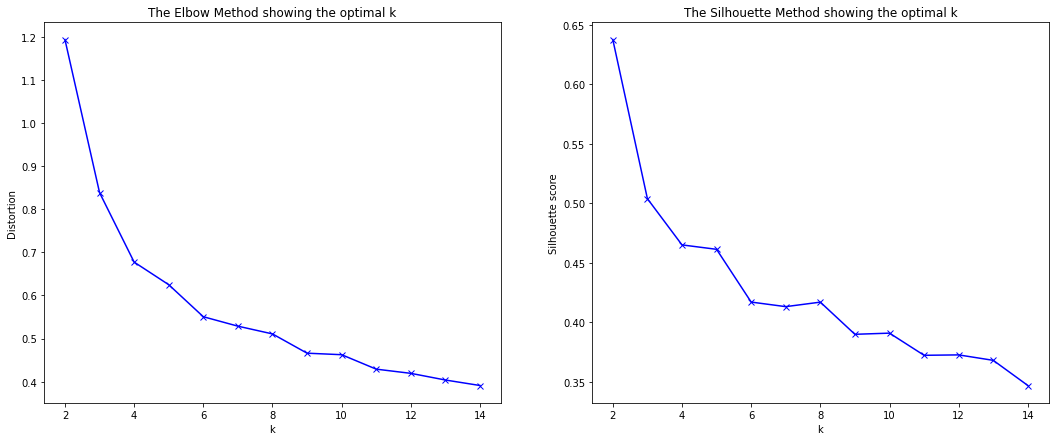

In [234]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_pca, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))


# Plot the elbow
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


#Further Analysis on K with Silhouette Method

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6376069016707032
For n_clusters = 3 The average silhouette_score is : 0.5043951546257536
For n_clusters = 4 The average silhouette_score is : 0.4649582556518021
For n_clusters = 5 The average silhouette_score is : 0.46132580673576823
For n_clusters = 6 The average silhouette_score is : 0.4170447279759495
For n_clusters = 7 The average silhouette_score is : 0.4130762125560412
For n_clusters = 8 The average silhouette_score is : 0.4164955261639557


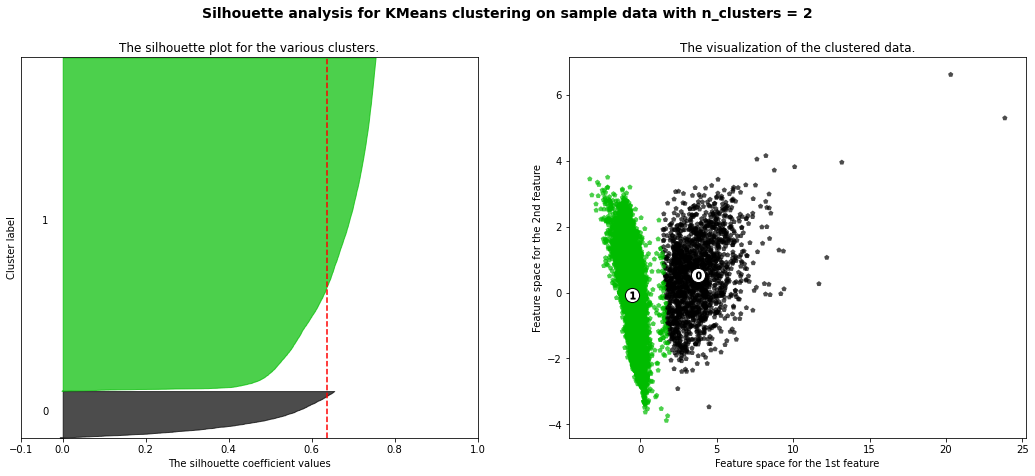

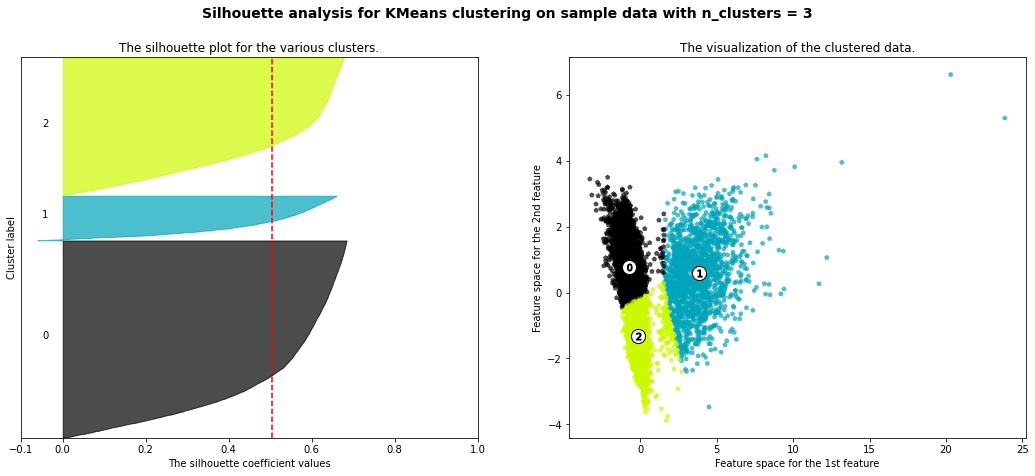

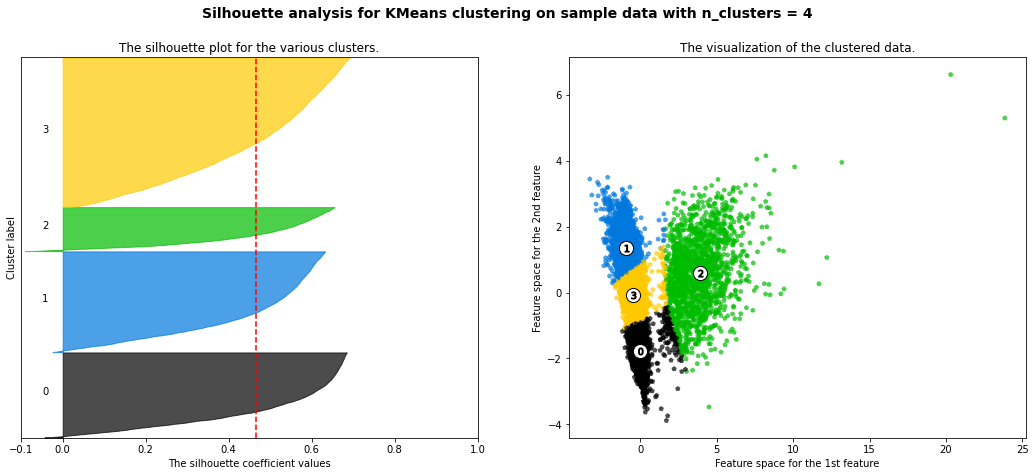

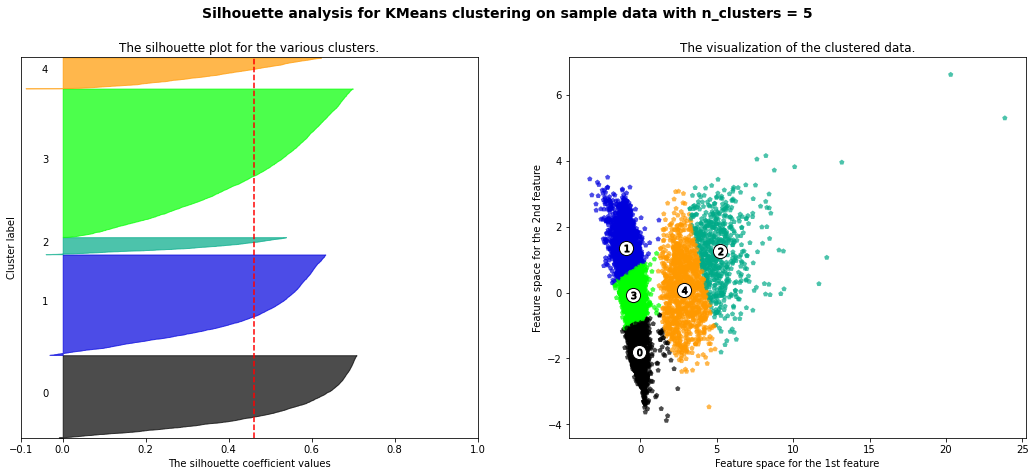

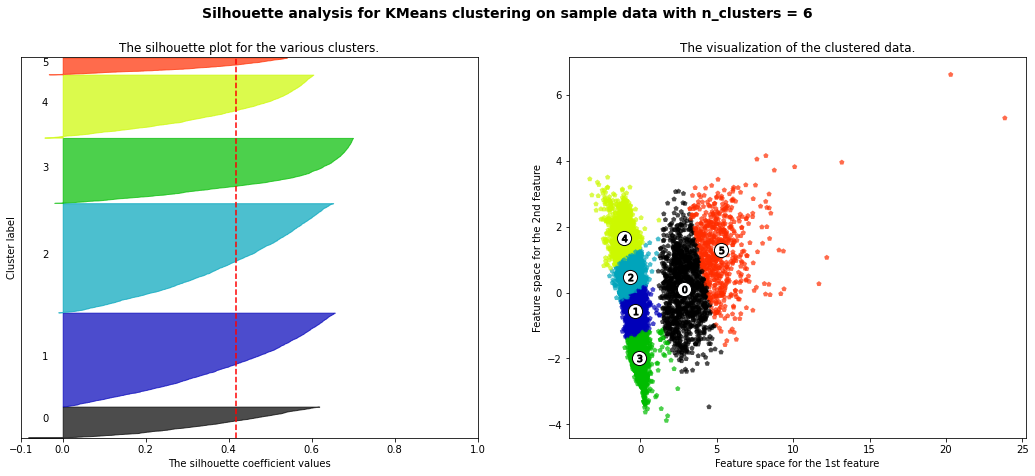

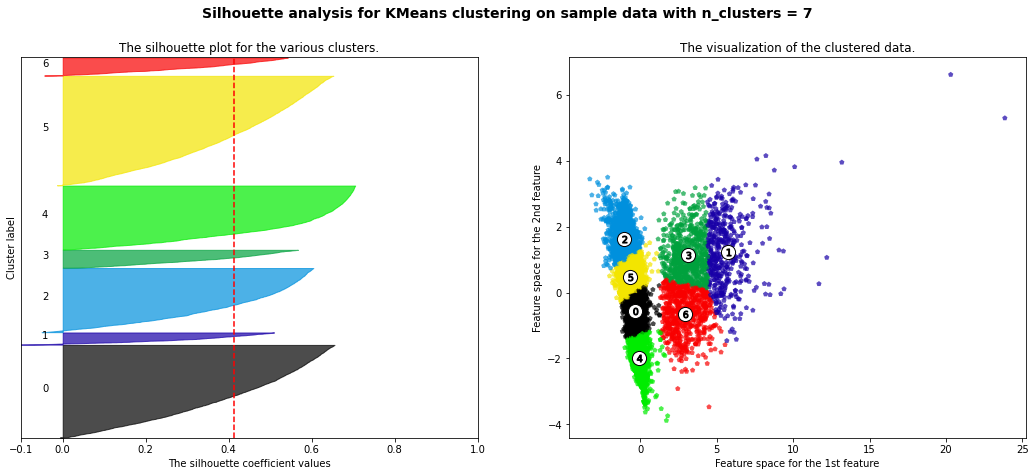

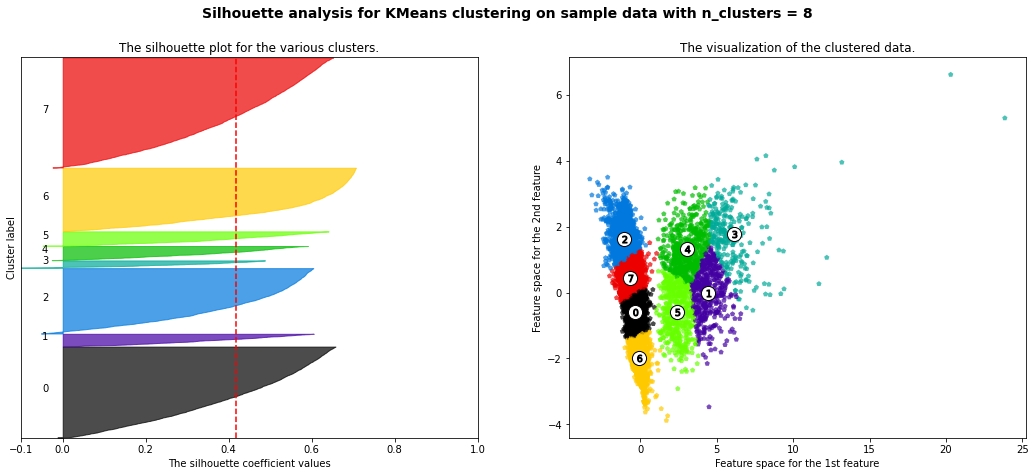

In [235]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Run k-means in the data set using the identified number of clusters.

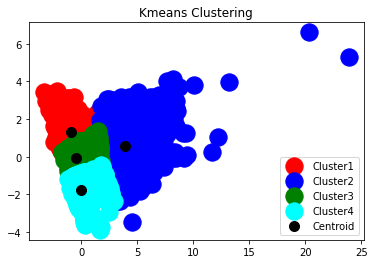

In [236]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster3')
plt.scatter(X_train_pca[y_kmeans == 3, 0], X_train_pca[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

#For each cluster identify its centroid and the number of samples of the minority class in that cluster

In [237]:
cluster_data["Cluster label"]=kmeans.labels_

#cluster_data["Centroid"]=kmeans.cluster_centers_
cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['y']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['y']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-0.9501757168983349, 1.330759724212863]",0,661,3013
1,"[-0.4605015162014076, -0.08744993023413775]",2,1312,4064
2,"[3.873536790951909, 0.5988198012455074]",1,1585,1
3,"[-0.05353629409707185, -1.7786085367110496]",3,1194,1850


#Train a random forest for each of the clusters that contains samples from more than one class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


mean of score for Random Forest Tree is:0.957


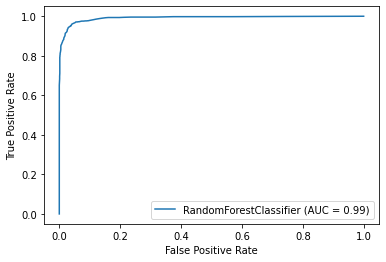

In [238]:
Two_cls_info=cluster_info[(cluster_info['Min_cls1_cnt_clusterwise']>0) & (cluster_info['Maj_cls0_cnt_clusterwise']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=cluster_data[cluster_data['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

rf_clf =RandomForestClassifier()
rf_score=[]

X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:16], Two_cls_data.iloc[:,16:17], test_size=0.2)

rf_clf.fit(X_train,y_train)
yrf_pred=rf_clf.predict(X_test)
y_true=y_test
rf_score.append(acc(y_true,yrf_pred))
print("mean of score for Random Forest Tree is:{:.3f}".format(mean(rf_score)) )

plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show()


#Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label


In [0]:


#If cluster has only one instance of class then label will be that class itself
cluster_info['new_label']=np.where(cluster_info['Maj_cls0_cnt_clusterwise']>cluster_info['Min_cls1_cnt_clusterwise'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

cluster_info_new=cluster_info
n_clusters=4
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=cluster_info_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)



#Second method to find out cluster label of left out fold

In [240]:
def cluster_2_label(alpha):
    if alpha == 0:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 1:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 2:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 3:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 4:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 5:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 6:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 7:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])

predict=kmeans.fit_predict(X_test_pca)
labels_2 = predict
curr_bin['cluster_label']=labels_2
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_2_label)

print(predict)
#curr_bin = curr_bin.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
print(pd.crosstab(curr_bin['y'],curr_bin['class_label']))
print("Accuracy of defining class label: " ,acc(curr_bin['class_label'],curr_bin['y']))
#curr_bin

[0 0 3 ... 1 2 1]
class_label    0    1
y                    
0            599  393
1            361  167
Accuracy of defining class label:  0.5039473684210526


#DT and RF model with 10 bin

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


Scores for stratified Decision Tree are:
[0.9026315789473685, 0.9026315789473685, 0.9078947368421053, 0.9026315789473685, 0.9032894736842105, 0.9026315789473685, 0.9039473684210526, 0.8993421052631579, 0.9026315789473685, 0.9013157894736842]
Scores for stratified Random Forest Tree are:
[0.9203947368421053, 0.9203947368421053, 0.9223684210526316, 0.9210526315789473, 0.9184210526315789, 0.9190789473684211, 0.9210526315789473, 0.9210526315789473, 0.9157894736842105, 0.9177631578947368]
Average Accuracy for Decision Tree: 0.90 +/- 0.00
AverageAccuracy for RF Tree: 0.92 +/- 0.00
classification_report for Decision Tree is:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       992
           1       0.88      0.83      0.85       528

    accuracy                           0.90      1520
   macro avg       0.90      0.89      0.89      1520
weighted avg       0.90      0.90      0.90      1520

classification_report for Random Forest Tree is

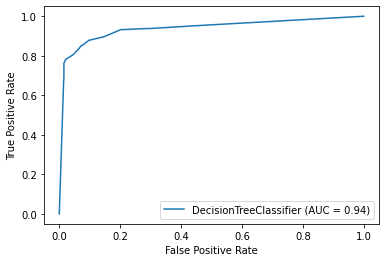

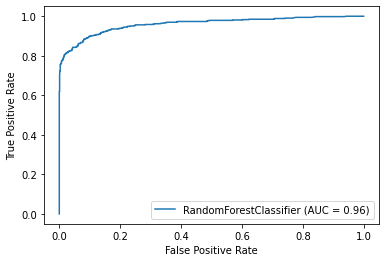

In [246]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA

# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df3.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

classifier = RandomForestClassifier()

rf_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=20,
                                random_state=10)
dt_clf=DecisionTreeClassifier(min_samples_split=20,max_depth=8,
                                random_state=10)
new_rf_score=[]
new_dt_score=[]

init0=0
init1=0

#Bin wise RF and DT model fitting and testing
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)

#Scaling and PCA for current bin
    X_train_bin=curr_bin.iloc[:,1:16]
    X_train_bin=sc.fit_transform(X_train_bin)
    y_train_bin=curr_bin.iloc[:,16:17]
    X_train_bin_pca= pca.fit_transform(X_train_bin)

#Fitting both model for current bin    
    dt_clf.fit(X_train_bin_pca,y_train_bin.values.ravel())
    rf_clf.fit(X_train_bin_pca,y_train_bin.values.ravel())

#predicting for testing
    yrf_pred=rf_clf.predict(X_test_pca)
    ydt_pred=dt_clf.predict(X_test_pca)
    y_true=y_test
    new_dt_score.append(acc(y_true,ydt_pred))
    new_rf_score.append(acc(y_true,yrf_pred)) 

print("Scores for stratified Decision Tree are:")
print(new_dt_score)
print("Scores for stratified Random Forest Tree are:")
print(new_rf_score)

print("Average Accuracy for Decision Tree: %0.2f +/- %0.2f" % (mean(new_dt_score), np.std(new_dt_score)))
print("AverageAccuracy for RF Tree: %0.2f +/- %0.2f" % (mean(new_rf_score), np.std(new_rf_score)))


#Result
print("classification_report for Decision Tree is:")

print(classification_report(y_test, ydt_pred))

print("classification_report for Random Forest Tree is:")

print(classification_report(y_test, yrf_pred))

plot_roc_curve(dt_clf, X_test_pca, y_test.values.ravel())
plt.show()

plot_roc_curve(rf_clf, X_test_pca, y_test.values.ravel())
plt.show()


#Permutation on results and Accuracies metrics

In [260]:
#Decision Tree results:
print("Baseline Decision Tree method accuries:")
print(old_dt_scores['test_score'])

print("\n Baseline Decision Tree method accuries mean:")
print(mean(old_dt_scores['test_score']))

print("\n New method Decision Tree accuries:")
print(new_dt_score) 

print("\n New method Decision Tree accuries mean:")
print(mean(new_dt_score)) 

tobs=mean(new_dt_score)-mean(old_dt_scores['test_score'])

dt_concat = np.concatenate((old_dt_scores['test_score'],new_dt_score))

count=0
for i in range(2000):
  perm = np.random.permutation(dt_concat)
  pcurr = perm[:len(old_dt_scores['test_score'])]
  pnew = perm[:len(new_dt_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Decision Tree p-value :",p)



#Random Forest Tree results:
print("Baseline Random Forest Tree method accuries:")
print(old_rf_scores['test_score'])

print("\n Baseline Random Forest Tree method accuries mean:")
print(mean(old_rf_scores['test_score']))

print("\n New method Random Forest Tree accuries:")
print(new_rf_score)


print("\n New method Random Forest Tree accuries mean:")
print(mean(new_rf_score)) 

tobs=mean(new_rf_score)-mean(old_rf_scores['test_score'])

rf_concat = np.concatenate((old_rf_scores['test_score'],new_rf_score))

count=0
for i in range(2000):
  perm = np.random.permutation(rf_concat)
  pcurr = perm[:len(old_rf_scores['test_score'])]
  pnew = perm[:len(new_rf_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Random Forest Tree p-value :",p)


Baseline Decision Tree method accuries:
[0.85901639 0.80983607 0.84868421 0.80921053 0.77960526 0.83223684
 0.82565789 0.81907895 0.84539474 0.80592105]

 Baseline Decision Tree method accuries mean:
0.8234641932700604

 New method Decision Tree accuries:
[0.9026315789473685, 0.9026315789473685, 0.9078947368421053, 0.9026315789473685, 0.9032894736842105, 0.9026315789473685, 0.9039473684210526, 0.8993421052631579, 0.9026315789473685, 0.9013157894736842]

 New method Decision Tree accuries mean:
0.9028947368421053
Decision Tree p-value : 0.0
Baseline Random Forest Tree method accuries:
[0.84918033 0.83278689 0.82565789 0.86184211 0.86184211 0.87171053
 0.85855263 0.8125     0.875      0.86184211]

 Baseline Random Forest Tree method accuries mean:
0.8510914581535807

 New method Random Forest Tree accuries:
[0.9203947368421053, 0.9203947368421053, 0.9223684210526316, 0.9210526315789473, 0.9184210526315789, 0.9190789473684211, 0.9210526315789473, 0.9210526315789473, 0.9157894736842105, 0.

As P-value is 0 We can reject Null Hypothesis and New Method is better than old one as Accuracies are better and not overfitted

#BoxPlot Comparison

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_dt_score'),
 Text(0.5, 1.0, 'new_dt_score')]

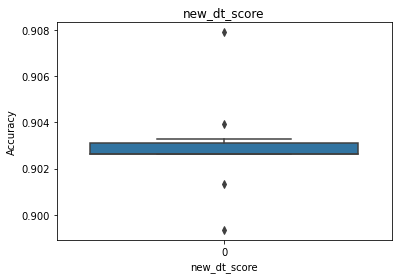

In [259]:
# make grouped boxplot

sns.boxplot(data= new_dt_score).set(title = 'new_dt_score', xlabel = 'new_dt_score', ylabel = 'Accuracy' )


[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_rf_score'),
 Text(0.5, 1.0, 'new_rf_score')]

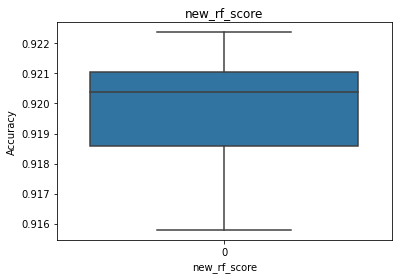

In [250]:

sns.boxplot(data= new_rf_score,dodge=True,fliersize=10).set(title = 'new_rf_score', xlabel = 'new_rf_score', ylabel = 'Accuracy' )

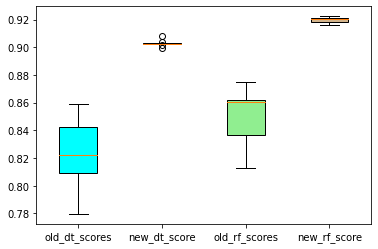

In [252]:
import matplotlib.pyplot as plt


box_plot_data=[old_dt_scores['test_score'],new_dt_score,old_rf_scores['test_score'],new_rf_score]
box=plt.boxplot(box_plot_data,vert=1,patch_artist=True,labels=['old_dt_scores','new_dt_score','old_rf_scores','new_rf_score'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()